In [77]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import os
import sys

# local modules
module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

import modelLib
from logfuncts import logger

In [78]:
modelLib = reload(modelLib)

df = modelLib.load_dataframe_from_sql("dart", limit=-1)

2017-12-15 23:53:30,503 root         DEBUG    loading entire df for river dart from sql


In [79]:
df = modelLib.preprocessing(df)

2017-12-15 23:53:30,669 root         DEBUG    Fill in missing timestamps by reindexing
2017-12-15 23:53:30,911 root         DEBUG    Convert cumulative rain to actual rain
2017-12-15 23:53:30,959 root         INFO     latest rain update at: 2017-12-15 23:00:00
2017-12-15 23:53:30,961 root         DEBUG    Concat rain and forecast to create model_rain
2017-12-15 23:53:30,969 root         DEBUG    interpolate model_rain


In [80]:
# take a nice section 
start_date = "2017-08-01 00:00:00"
end_date = "2017-11-01 00:00:00"
df = df[(df.index>=start_date) & (df.index < end_date)]

# some null values but let's just set them to base level 0.4
df[df.level.isnull()] = 0.4

# also don't believe that there was 20mm of rain in 15 minutes....

df.loc[df.model_rain > 15, 'model_rain'] = 0

In [81]:
df = modelLib.model(df, from_latest_level=False)

2017-12-15 23:53:31,934 root         INFO     *** RUNNING MODEL ***
2017-12-15 23:53:31,941 root         INFO     Run model from: 2017-08-01 01:15:00
2017-12-15 23:53:31,942 root         INFO     Starting level update: 0.363


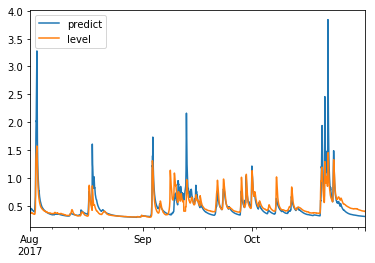

In [83]:
df[["predict", "level"]].plot()
plt.show()

In [121]:
from math import sqrt

prediction_error = (df['predict'] - df['level'])[df.predict.notnull()].abs()
print "Mean absolute error:", prediction_error.mean().round(4)
print "Root mean squared error:", round(sqrt(prediction_error.pow(2).mean()), 3)

Mean absolute error: 0.0807
Root mean squared error: 0.166
